In [121]:
from IPython.display import display, HTML
display(HTML('<link rel="preconnect" href="https://fonts.googleapis.com">\
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\
<link href="https://fonts.googleapis.com/css2?family=Comfortaa:wght@300&display=swap" rel="stylesheet">'))

In [122]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

<font face="Comfortaa"><h1> Load Dataset

In [123]:
import pandas as pd
import os

excel_file_path = "0_DATASET/KPMG.xlsx"

xls = pd.ExcelFile(excel_file_path)

sheet_names = xls.sheet_names

In [124]:
dfs = {}

In [125]:
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    dfs[sheet_name] = dfs[sheet_name].tail(-1)
    dfs[sheet_name].columns = dfs[sheet_name].iloc[0]
    dfs[sheet_name] = dfs[sheet_name][1:]
    dfs[sheet_name] = dfs[sheet_name].reset_index(drop=True)

In [126]:
Transactions = dfs['Transactions']
CustomerDemographic = dfs['CustomerDemographic']
CustomerAddress = dfs['CustomerAddress']

<font face="Comfortaa"><h1> 2 Data Validation</h1>
    <font face="Comfortaa"><h2>2.1 Transactions

In [6]:
Transactions.head()

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [7]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [8]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=1)

In [9]:
#convert excel serial to date
base_date = datetime(1900, 1, 1)

def excel_serial_to_date(serial):
    if pd.isnull(serial):
        return pd.NaT  # Return NaT if the value is NaN or NaT
    return base_date + timedelta(days=serial - 2)

In [10]:
Transactions.describe(include='all')

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [11]:
#excel data convert
Transactions['product_first_sold_date'] = Transactions['product_first_sold_date'].apply(excel_serial_to_date)

#transaction date
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

#primary key & foreign key 
Transactions['transaction_id'] = Transactions['transaction_id'].astype('int')
Transactions['product_id'] = Transactions['product_id'].astype('int')
Transactions['customer_id'] = Transactions['customer_id'].astype('int')

#price & cost 
Transactions['list_price'] = Transactions['list_price'].astype('float')
Transactions['standard_cost'] = Transactions['standard_cost'].astype('float')

#product details 
Transactions['brand'] = Transactions['brand'].astype('category')
Transactions['product_line'] = Transactions['product_line'].astype('category')
Transactions['product_class'] = Transactions['product_class'].astype('category')
Transactions['product_size'] = Transactions['product_size'].astype('category')

In [12]:
Transactions.describe(include='all')

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803
unique,NaN,NaN,NaN,364,2,2,6,4,3,3,NaN,NaN,100
top,NaN,NaN,NaN,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,NaN,NaN,1992-10-02 00:00:00
freq,NaN,NaN,NaN,82,9829,19821,4253,14176,13826,12990,NaN,NaN,234
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-21 00:00:00
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-06 00:00:00
mean,10000.500000,45.36465,1738.246050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,NaN
std,5773.647028,30.75359,1011.951046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,NaN
min,1.000000,0.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,NaN
25%,5000.750000,18.00000,857.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,NaN


In [13]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [14]:
Transactions = Transactions[Transactions['order_status']=='Approved']

In [15]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int32         
 1   product_id               19821 non-null  int32         
 2   customer_id              19821 non-null  int32         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  object        
 5   order_status             19821 non-null  object        
 6   brand                    19625 non-null  category      
 7   product_line             19625 non-null  category      
 8   product_class            19625 non-null  category      
 9   product_size             19625 non-null  category      
 10  list_price               19821 non-null  float64       
 11  standard_cost            19625 non-null  float64       
 12  product_first_sold_date  19625 n

In [16]:
Transactions.isnull().sum()

1
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

<font face="Comfortaa"><h2>Transactions</h2>
The **Transactions** contains 20000 rows and 13 columns with missing values before cleaning.

<font face="Comfortaa"><ul>
    <li> **transaction_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**product_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>- **customer_id**:  Exhibiting unique entries without any missing values or duplicates.</li><li>**transaction_date**: Ranging between 1/1/2017 and 12/31/2017. No missing values are present in this column, and no changes have been applied.</li><li>**online_order**: The 'online_order' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**order_status**: The 'order_status' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied. All order_status = 'Cancelled' were dropped to ensure all records listed are Approved transactions.</li><li>**brand**: The 'brand' column encompasses 6 distinct categories. All 196 missing values were left untouched.</li><li>**product_line**: TThe 'product_line' column encompasses 4 distinct categories. All 196 missing values were left untouched.</li><li>**product_class**: The 'product_class' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**product_size**: The 'product_size' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**list_price**: Ranges between 12 and 2091. No missing values are present in this column, and no changes have been applied.</li><li>**standard_cost**:  Ranges between 7 and 1759. All 196 missing values were left untouched.</li><li>**product_first_sold_date**: Ranges between 1991 and 2016. All 196 missing values were left untouched.


<font face="Comfortaa">After the data validation, the dataset contains **19821 rows and 13 columns**.

<font face="Comfortaa"><h2>2.2 CustomerAddress</h2>

In [17]:
CustomerAddress.head()

1,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [18]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [19]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [20]:
state_map = {'New South Wales':'NSW', 'Victoria':'VIC'}
CustomerAddress['state'] = CustomerAddress['state'].replace(state_map)

In [21]:
CustomerAddress['customer_id'] = CustomerAddress['customer_id'].astype('int')
CustomerAddress['postcode'] = CustomerAddress['postcode'].astype('int')
CustomerAddress['property_valuation'] = CustomerAddress['property_valuation'].astype('int')
CustomerAddress['country'] = CustomerAddress['country'].astype('category')
CustomerAddress['state'] = CustomerAddress['state'].astype('category')

In [22]:
CustomerAddress.describe(include='all')

1,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,3,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2140,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


<font face='Comfortaa'><h2>CustomerAddress</h2>
    The <b>CustomerAddress</b> contains 3999 rows and 6 columns with missing values before cleaning.
    
<font face="Comfortaa"><ul>
    <li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**address**: No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**state**: The state column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'New South Wales' have been replaced with 'NSW' while 'Victoria' have been replaced with 'VIC'.</li><li>**country**: No missing values are present in this column, and no changes have been applied.</li><li>**property_valuation**: No missing values are present in this column, and no changes have been applied.</li>


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2>2.3 CustomerDemographic</h2>

In [23]:
CustomerDemographic.head()

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [24]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [25]:
#drop redundant columns & name for privacy
CustomerDemographic = CustomerDemographic.drop(axis =1, columns=['default','first_name','last_name'])

In [26]:
#drop missing values with <5%
cols_to_drop = CustomerDemographic.columns[CustomerDemographic.isna().sum() <= len(CustomerDemographic) * 0.05]
CustomerDemographic = CustomerDemographic.dropna(subset = cols_to_drop)

In [27]:
cols_to_drop

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object', name=1)

In [28]:
#primary key
CustomerDemographic['customer_id'] = CustomerDemographic['customer_id'].astype('int')
CustomerDemographic['past_3_years_bike_related_purchases'] = CustomerDemographic['past_3_years_bike_related_purchases'].astype('int')
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].astype('int')

#DOB
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

In [29]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int32         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int32         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3416 non-null   object        
 5   job_industry_category                3257 non-null   object        
 6   wealth_segment                       3913 non-null   object        
 7   deceased_indicator                   3913 non-null   object        
 8   owns_car                             3913 non-null   object        
 9   tenure                               3913 non-null   int32         
dtypes: datetime6

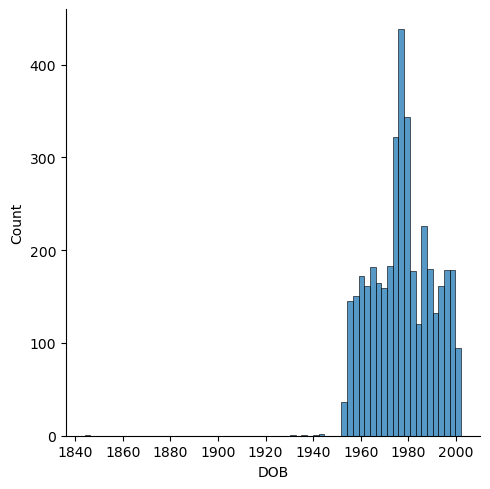

In [30]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

In [31]:
CustomerDemographic.loc[CustomerDemographic['DOB'].dt.year < 1953]

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20
657,658,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8
719,720,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6
1091,1092,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5
2412,2413,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17
3409,3410,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16


In [32]:
DOB_to_replace = CustomerDemographic[CustomerDemographic['DOB'].dt.year < 1953]['DOB']
CustomerDemographic.loc[DOB_to_replace.index, 'DOB'] = DOB_to_replace.apply(lambda x: x.replace(year=1977))

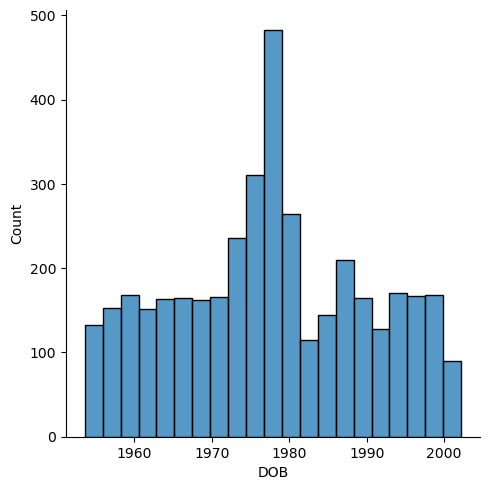

In [33]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

In [34]:
last_transaction_date = Transactions['transaction_date'].max()

In [35]:
CustomerDemographic['age'] = last_transaction_date.year - CustomerDemographic['DOB'].dt.year
CustomerDemographic['age'] = CustomerDemographic['age'].astype('int')

In [36]:
gender_map = {"F":"Female", "Femal":"Female", "M":"Male"}
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_map)

In [37]:
#details
CustomerDemographic['gender'] = CustomerDemographic['gender'].astype('category')
CustomerDemographic['job_title'] = CustomerDemographic['job_title'].astype('category')
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].astype('category')
CustomerDemographic['wealth_segment'] = CustomerDemographic['wealth_segment'].astype('category')
CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('category')
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].astype('category')

In [38]:
CustomerDemographic.describe(include='all')

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
count,3913.000000,3913,3913.000000,3913,3416,3257,3913,3913,3913,3913.000000,3913.000000
unique,NaN,3,NaN,3444,195,9,3,2,2,NaN,NaN
top,NaN,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN,NaN
freq,NaN,2039,NaN,7,43,796,1954,3911,1974,NaN,NaN
first,NaN,NaN,NaN,1953-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1999.325837,NaN,49.041912,NaN,NaN,NaN,NaN,NaN,NaN,10.657041,39.886021
std,1155.183301,NaN,28.764990,NaN,NaN,NaN,NaN,NaN,NaN,5.660146,12.539133
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,15.000000
25%,1002.000000,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,30.000000


In [39]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int32         
 1   gender                               3913 non-null   category      
 2   past_3_years_bike_related_purchases  3913 non-null   int32         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3416 non-null   category      
 5   job_industry_category                3257 non-null   category      
 6   wealth_segment                       3913 non-null   category      
 7   deceased_indicator                   3913 non-null   category      
 8   owns_car                             3913 non-null   category      
 9   tenure                               3913 non-null   int32         
 10  age         

In [40]:
CustomerDemographic.isnull().sum()

1
customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

<font face='Comfortaa'><h2>CustomerDemographic</h2></font>
<font face='Comfortaa'>
The **CustomerDemographic** contains 4000 rows and 10 columns with missing values before cleaning.</font>
<font face='Comfortaa'><ul><li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**gender**: The 'gender' column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'Femal', 'F' have been replaced with 'Female' while 'M' have been replaced with 'Male'.</li><li>**past_3_years_bike_related_purchases**: Ranging between 0 and 100. No missing values are present in this column, and no changes have been applied.</li><li>**DOB**: Birth Year Ranging between 1843 and 2002. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data. Birth Year with earlier than  1953 were all replaced by median.</li><li>**job_title**: All 497 instances with missing values were left untouched.</li><li>**job_industry_category**: The 'job_industry_category' column encompasses 9 distinct categories. All 656 instances with missing values were left untouched.</li><li>**wealth_segment**: The 'job_industry_category' column encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>deceased_indicator**: The 'deceased_indicator' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**owns_car**: The 'owns_car' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**tenure**: Ranging between 0 and 100. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data.</li>

<font face='Comfortaa'>**Added Feature**
<font face='Comfortaa'><ul><li>**age**: The age column was calculated by subtracting the year of last transaction date by the year of DOB. <br>          After the data validation, the dataset contains **3913 rows and 11 columns**.</li>
    


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2> 2.4 RFM Analysis

In [41]:
last_transaction_date = Transactions['transaction_date'].max()

In [42]:
RFM = Transactions.groupby('customer_id').agg(
    last_transaction_date=('transaction_date', 'max'),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()
RFM

,customer_id,last_transaction_date,frequency,monetary
0,1,2017-12-23,11,9084.45
1,2,2017-08-24,3,4149.07
2,3,2017-09-19,8,9888.23
3,4,2017-06-18,2,1047.72
4,5,2017-12-14,6,5903.20
...,...,...,...,...
3488,3497,2017-11-08,3,3744.07
3489,3498,2017-08-25,6,5177.06
3490,3499,2017-11-09,7,7673.48
3491,3500,2017-08-08,6,4922.41


In [43]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3493 non-null   int64         
 1   last_transaction_date  3493 non-null   datetime64[ns]
 2   frequency              3493 non-null   int64         
 3   monetary               3493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 109.3 KB


In [44]:
RFM['recency'] = last_transaction_date - pd.to_datetime(RFM['last_transaction_date'])

In [45]:
def calculate_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("1")
        elif val <= percentile_40:
            val_scores.append("2")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("4")
        else:
            val_scores.append("5")
    
    return val_scores

In [46]:
def calculate_r_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("5")
        elif val <= percentile_40:
            val_scores.append("4")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("2")
        else:
            val_scores.append("1")
    
    return val_scores

In [47]:
RFM['R Score'] = calculate_r_score(RFM['recency'])
RFM['F Score'] = calculate_score(RFM['frequency'])
RFM['M Score'] = calculate_score(RFM['monetary'])

In [48]:
RFM['RFM Score'] = RFM['R Score'].astype('str')+RFM['F Score'].astype('str')+RFM['M Score'].astype('str')

<font face='Comfortaa'><h3> 2.4.1 RFM Score

In [49]:
rfm_score = pd.read_excel('0_DATASET/RFM Scores.xlsx')

In [50]:
rfm_score

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 231, 241, 251, 233, 232, 223, 222, 1..."


In [51]:
rfm_score = rfm_score['Scores'].str.split(',').explode().str.split(' ').explode().reset_index()\
.merge(rfm_score.reset_index()[['index','Segment']], on = 'index')

In [52]:
rfm_score = rfm_score[rfm_score['Scores'] !='']

In [53]:
rfm_score = rfm_score.drop_duplicates(subset='Scores')

In [54]:
rfm_score.head()

,index,Scores,Segment
0,0,555,Champions
2,0,554,Champions
4,0,544,Champions
6,0,545,Champions
8,0,454,Champions


In [55]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555
1,2,2017-08-24,3,4149.07,128 days,1,1,2,112
2,3,2017-09-19,8,9888.23,102 days,1,4,5,145
3,4,2017-06-18,2,1047.72,195 days,1,1,1,111
4,5,2017-12-14,6,5903.20,16 days,4,3,3,433


In [56]:
RFM = RFM.merge(rfm_score, left_on = 'RFM Score', right_on='Scores')

In [57]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [58]:
RFM['Segment'].value_counts()

Hibernating customers    563
Champions                463
New Customers            426
At Risk                  411
Loyal                    377
Lost customers           365
Potential Loyalist       277
Need Attention           216
Promising                195
About To Sleep           114
Cannot Lose Them          86
Name: Segment, dtype: int64

<font face='Comfortaa'><h3>
    **Customer RFM Scores Alongside Demographic and Address Information**<br></h3>
The RFM scores for each individual customer, accompanied by their comprehensive demographic and address particulars, were computed utilizing the methodology delineated within the following <a href='https://ploiitubsamon.medium.com/rfm-analysis-for-customer-segmentation-with-power-bi-5d2f5bd62038'>RFM ANALYSIS blog</a>. Subsequent to the calculation of RFM scores, customers were categorized into distinct segments based on the prescribed table within the same blog post. As part of the subsequent process involving the construction of a classification model, a supplementary column will be introduced. This column will assign a value of 1 to customers categorized as "Champions" or "Loyal," while assigning a value of 0 to those falling under other segments.

In [59]:
demographic = CustomerDemographic.merge(CustomerAddress)

In [60]:
demographic.head()

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,64,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,37,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,56,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,40,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,51,9 Oakridge Court,3216,VIC,Australia,9


In [61]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [62]:
high_lead_val = ["Champions","Loyal"]

RFM['high_val_lead'] = RFM['Segment'].apply(lambda x: 1 if x in high_lead_val else 0)

In [63]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment,high_val_lead
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions,1
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions,1
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions,1
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions,1
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions,1


In [64]:
RFM = RFM[['customer_id', 'high_val_lead']]

In [65]:
demographic_RFM = RFM.merge(demographic)

In [66]:
demographic_RFM.columns

Index(['customer_id', 'high_val_lead', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [67]:
demographic_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3412 non-null   int64         
 1   high_val_lead                        3412 non-null   int64         
 2   gender                               3412 non-null   category      
 3   past_3_years_bike_related_purchases  3412 non-null   int32         
 4   DOB                                  3412 non-null   datetime64[ns]
 5   job_title                            2997 non-null   category      
 6   job_industry_category                2852 non-null   category      
 7   wealth_segment                       3412 non-null   category      
 8   deceased_indicator                   3412 non-null   category      
 9   owns_car                             3412 non-null   category      
 10  tenure      

<font face='Comfortaa'>The RFM score by customer_id are then merged with CustomerDemographics and CustomerAddress dataframe. 

In [68]:
features = demographic_RFM[['gender','past_3_years_bike_related_purchases','job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age','state','property_valuation']]
y = demographic_RFM['high_val_lead']

In [69]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,past_3_years_bike_related_purchases,tenure,age,property_valuation,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,93,11,64,10,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,72,21,41,3,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0
2,46,16,32,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,74,14,50,11,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,16,4,39,11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
features_cat = features.iloc[:,4:]
features_num = features.iloc[:,:4]

In [71]:
X_num = features_num.values
X_cat = features_cat.values

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat), axis=1)

In [74]:
X

array([[ 1.53670408,  0.05584438,  1.94012699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80365799,  1.81848094,  0.09842618, ...,  1.        ,
         1.        ,  0.        ],
       [-0.10392288,  0.93716266, -0.62223935, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.76715505,  0.760899  ,  1.29953541, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.50179712, -1.35426487, -1.42297883, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.52440234,  0.05584438,  0.81909172, ...,  0.        ,
         0.        ,  1.        ]])

<font face='Comfortaa'><h2> 3. Feature Selection </h2>
    <h3> 3.1 PCA

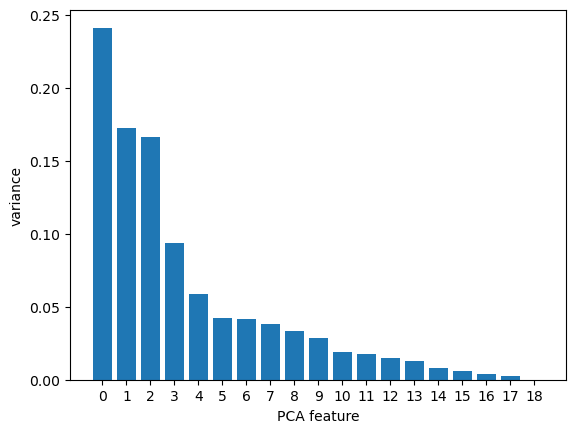

In [75]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

<font face='Comfortaa'><h3> 3.2 RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=28)

In [77]:
rf_model.fit(X, y)

RandomForestClassifier(random_state=28)

In [78]:
# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Print the importance scores for each feature
for feature, importance in enumerate(feature_importances_rf):
    print(f"Feature {feature}: Importance = {importance:.4f}")

Feature 0: Importance = 0.2250
Feature 1: Importance = 0.1672
Feature 2: Importance = 0.1993
Feature 3: Importance = 0.1349
Feature 4: Importance = 0.0335
Feature 5: Importance = 0.0000
Feature 6: Importance = 0.0081
Feature 7: Importance = 0.0213
Feature 8: Importance = 0.0155
Feature 9: Importance = 0.0073
Feature 10: Importance = 0.0190
Feature 11: Importance = 0.0105
Feature 12: Importance = 0.0148
Feature 13: Importance = 0.0054
Feature 14: Importance = 0.0232
Feature 15: Importance = 0.0300
Feature 16: Importance = 0.0358
Feature 17: Importance = 0.0216
Feature 18: Importance = 0.0274


<font face='Comfortaa'><h3> 3.3 GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=28)

# Fit the model to your data
gb_model.fit(X, y)

# Get feature importances
feature_importances_gb = gb_model.feature_importances_

# Print the importance scores for each feature
for feature, importance in enumerate(feature_importances_gb):
    print(f"Feature {feature}: Importance = {importance:.4f}")

Feature 0: Importance = 0.2370
Feature 1: Importance = 0.1263
Feature 2: Importance = 0.2569
Feature 3: Importance = 0.1181
Feature 4: Importance = 0.0032
Feature 5: Importance = 0.0000
Feature 6: Importance = 0.0146
Feature 7: Importance = 0.0275
Feature 8: Importance = 0.0318
Feature 9: Importance = 0.0101
Feature 10: Importance = 0.0142
Feature 11: Importance = 0.0080
Feature 12: Importance = 0.0181
Feature 13: Importance = 0.0046
Feature 14: Importance = 0.0260
Feature 15: Importance = 0.0178
Feature 16: Importance = 0.0385
Feature 17: Importance = 0.0073
Feature 18: Importance = 0.0401


<font face='Comfortaa'>
Evaluating the results of three distinct assessments of feature importance, it becomes evident that certain features hold greater significance. Moving forward with the model development phase, these 3 pivotal features have been designated as the variables X.

<font face='Comfortaa'><h2> 4 Train Validation Test Split </h2>

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
important_features = list(range(0,3))
important_features

[0, 1, 2]

In [82]:
X = X[:, important_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2aa

<font face='Comfortaa'><h2> 5 Model Development </h2>
    <h3>5.1 Define functions

In [83]:
def get_y_pred_model_fit(model, X_train_resampled, y_train_resampled):
    model.fit(X_train_resampled, y_train_resampled)
    # Predict on the original test data
    y_pred = model.predict(X_val)
    return y_pred

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    f1 = f1_score(y_val, y_pred)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-Score:", f1)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

def confusion_matrix_(y_val,y_pred):
    confusion_matrix_ = confusion_matrix(y_val,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<font face='Comfortaa'><h3>5.3 Model Comparison </h3>

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(random_state=28),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=28),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=28),
    'RandomForestClassifier': RandomForestClassifier(random_state=28),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=28),
    'XGBClassifier': XGBClassifier(random_state=28)
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 Score': []
}

# Loop through models, fit, predict, and calculate scores
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = f1_score(y_val, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Specificity'].append(specificity)
    results['F1 Score'].append(f1)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
results_df.style.background_gradient(axis=0, cmap='coolwarm')

,Model,Accuracy,Precision,Recall,Specificity,F1 Score
0,LogisticRegression,0.740849,0.000000,0.000000,1.000000,0.000000
1,GaussianNB,0.740849,0.000000,0.000000,1.000000,0.000000
2,DecisionTreeClassifier,0.609078,0.244318,0.242938,0.737154,0.243626
3,KNeighborsClassifier,0.688141,0.218750,0.079096,0.901186,0.116183
4,SVC,0.740849,0.000000,0.000000,1.000000,0.000000
5,RandomForestClassifier,0.686676,0.196721,0.067797,0.903162,0.100840
6,GradientBoostingClassifier,0.737921,0.400000,0.022599,0.988142,0.042781
7,XGBClassifier,0.669107,0.247423,0.135593,0.855731,0.175182


LogisticRegression


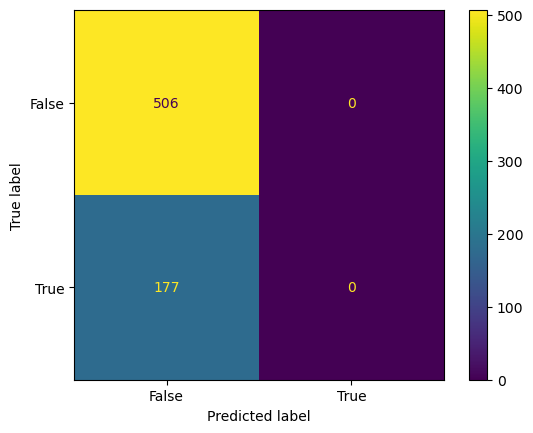

GaussianNB


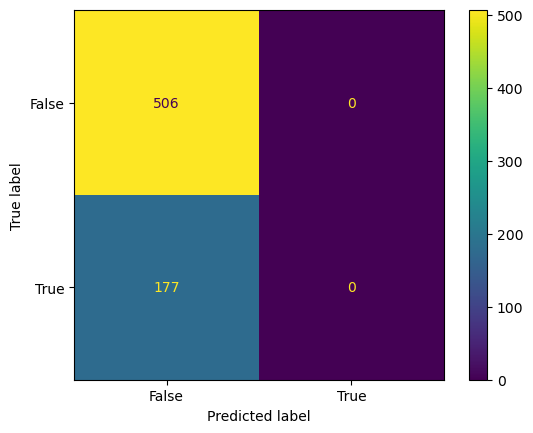

DecisionTreeClassifier


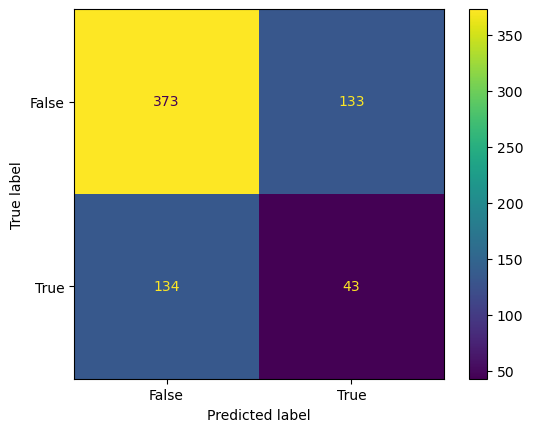

KNeighborsClassifier


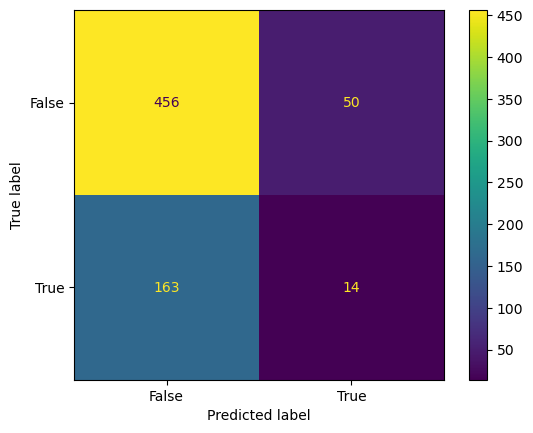

SVC


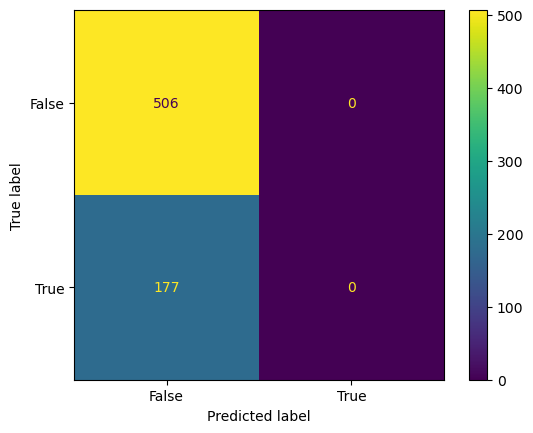

RandomForestClassifier


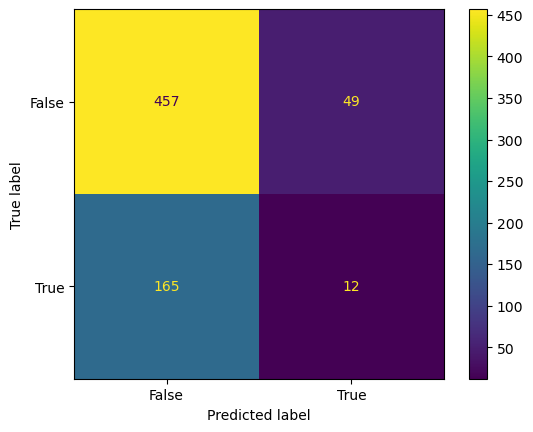

GradientBoostingClassifier


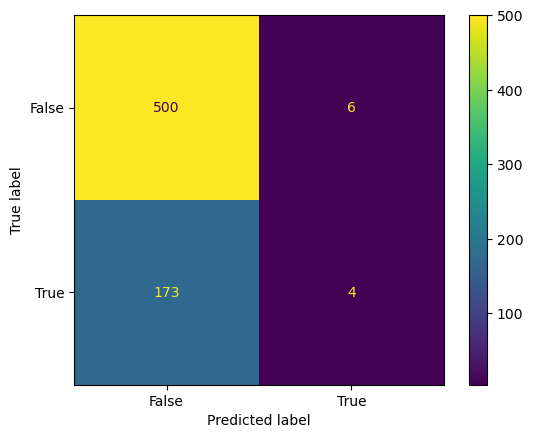

XGBClassifier


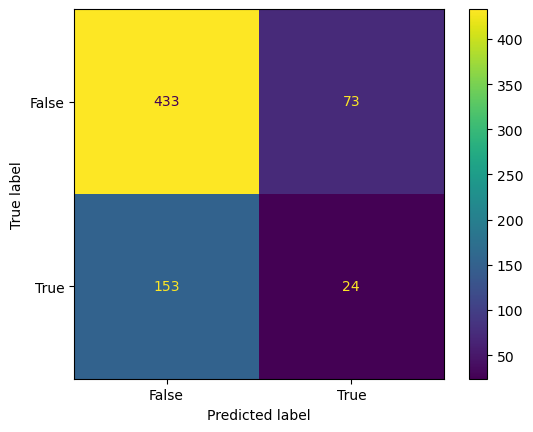

In [89]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(model_name)
    confusion_matrix_(y_val,y_pred)

In [90]:
from xgboost import XGBClassifier

dt =  XGBClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

In [91]:
scores(y_val, y_pred)

Accuracy: 0.6691068814055637
Precision: 0.24742268041237114
Recall (Sensitivity): 0.13559322033898305
Specificity: 0.8557312252964426
F1-Score: 0.17518248175182485


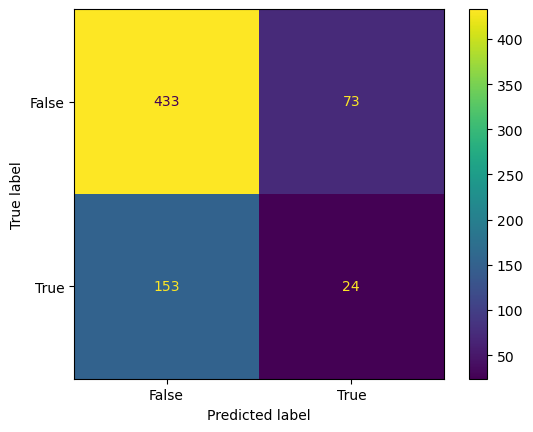

In [92]:
confusion_matrix_(y_val,y_pred)

In [93]:
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()
to_cm = pd.DataFrame(data=[tn, fp,fn, tp], index=['tn', 'fp','fn', 'tp'])
to_cm.to_csv('cm.csv')

In [94]:
to_cm

,0
tn,433
fp,73
fn,153
tp,24


<font face='Comfortaa'>
Given the specific goal of identifying high-value leads with limited resources, one must achieve a balance between precision and recall. If the priority is placed on precision, the focus lies on minimizing the allocation of resources towards false positives. On the other hand, if the emphasis is on recall, the objective is to capture the maximum number of actual high-value leads, even if this results in some false positives. 



**XGBoost Classifier** appear to exhibit the optimal equilibrium between precision and recall. Nevertheless, the model display low recall rates, indicating the potential for overlooking opportunities. To address this, adjustments to the model's thresholds or exploration of alternative techniques might be necessary to enhance recall while upholding an acceptable level of precision.

In [95]:
from xgboost import XGBClassifier

xgbc =  XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred_ = xgbc.predict(X_test)

<font face='Comfortaa'><h3>5.4 Testing Model </h3>

In [96]:
scores(y_test, y_pred_)

Accuracy: 0.7086383601756955
Precision: 0.2876712328767123
Recall (Sensitivity): 0.125
Specificity: 0.8990291262135922
F1-Score: 0.17427385892116182


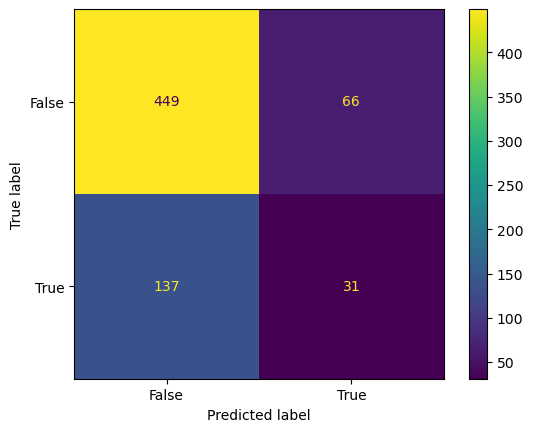

In [97]:
confusion_matrix_(y_test,y_pred)

In [98]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
to_cm = pd.DataFrame(data=[tn, fp,fn, tp], index=['tn', 'fp','fn', 'tp'])
to_cm.to_csv('cm.csv')

<font face='Comfortaa'><h3>5.5 Predicting New Customer List </h3>

In [100]:
NewCustomerList = dfs['NewCustomerList']
NewCustomerList.head()

1,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125


In [101]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                        

In [102]:
NewCustomerList = NewCustomerList

In [103]:
NewCustomerList.describe(include='all')

1,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,...,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,...,3,1,16,NaN,NaN,NaN,NaN,NaN,324.0,324.0000
top,Rozamond,Sissel,Female,60,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,760.0,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,...,506,1000,173,NaN,NaN,NaN,NaN,NaN,13.0,13.0000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.747340,0.839005,0.942673,0.870514,498.819000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.205082,0.248858,0.294832,0.280891,288.810997,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.400000,0.400000,0.400000,0.340000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.570000,0.637500,0.712500,0.658750,250.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.750000,0.820000,0.912500,0.842625,500.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.920000,1.031875,1.142969,1.062500,750.250000,NaN,NaN


In [104]:
NewCustomerList['gender'] = NewCustomerList['gender'].astype('category')
NewCustomerList['job_industry_category'] = NewCustomerList['job_industry_category'].astype('category')
NewCustomerList['wealth_segment'] = NewCustomerList['wealth_segment'].astype('category')
NewCustomerList['owns_car'] = NewCustomerList['owns_car'].astype('category')
NewCustomerList['state'] = NewCustomerList['state'].astype('category')


NewCustomerList['past_3_years_bike_related_purchases'] = NewCustomerList['past_3_years_bike_related_purchases'].astype('int')
NewCustomerList['tenure'] = NewCustomerList['tenure'].astype('int')
NewCustomerList['property_valuation'] = NewCustomerList['property_valuation'].astype('int')


NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])

In [105]:
NewCustomerList['age'] = last_transaction_date.year - NewCustomerList['DOB'].dt.year

In [106]:
new_features = NewCustomerList[['gender','past_3_years_bike_related_purchases','job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age','state','property_valuation']]
new_features.head()

1,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
0,Male,86,Manufacturing,Mass Customer,Yes,14,60.0,QLD,6
1,Male,69,Property,Mass Customer,No,16,47.0,NSW,11
2,Female,10,Financial Services,Affluent Customer,No,10,43.0,VIC,5
3,Female,64,Manufacturing,Affluent Customer,Yes,5,38.0,QLD,1
4,Female,34,Financial Services,Affluent Customer,No,19,52.0,NSW,9


In [107]:
new_features = pd.get_dummies(new_features, drop_first=True)
new_features.head()

,past_3_years_bike_related_purchases,tenure,age,property_valuation,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,86,14,60.0,6,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0
1,69,16,47.0,11,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,10,10,43.0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,64,5,38.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,34,19,52.0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [108]:
new_features_cat = new_features.iloc[:,4:]
new_features_num = new_features.iloc[:,:4]

In [109]:
X_new_num = new_features_num.values
X_new_cat = new_features_cat.values

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
X_new_num = scaler.fit_transform(X_new_num)
X_new = np.concatenate((X_new_num, X_new_cat), axis=1)

In [112]:
X_new = X_new[:, important_features]

In [113]:
y_new = xgbc.predict(X_new)

In [114]:
NewCustomerList['Predicted']= pd.DataFrame(y_new)

In [115]:
NewCustomerList['Predicted'].value_counts()

0    863
1    137
Name: Predicted, dtype: int64

In [116]:
NewCustomerList.to_csv('NewCustomerList.csv')

<font face='Comfortaa'>Utilizing the **XGBoost Classifier** as the chosen model, a projection was made on the NewCustomerList dataset consisting of 1000 customers. Among these, approximately 137 customers were predicted to be potential high-value leads, falling under the "Champions" or "Loyal Customer" category. Regrettably, owing to the early stage of the model's development, the actual count of true "Champions" or "Loyal Customers" within this group is estimated to be around 30%, translating to roughly 42 customers.